In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import json
import numpy as np
%matplotlib inline

In [47]:
def my_plot(gen, attack, attr):

    figure(figsize=(15, 15), dpi=100)

    ## POSITION
    genuine_coords = gen[attr].to_list()
    # genuine_x = [i[0] for i in genuine_coords]
    genuine_y = [float(np.linalg.norm(i)) for i in genuine_coords]

    attack_coords = attack[attr].to_list()
    # attack_x = [i[0] for i in attack_coords]
    attack_y = [float(np.linalg.norm(i)) for i in attack_coords]

    plt.subplot(2,2,1)
    plt.title('Genuine Car {}'.format(attr))
    plt.xlabel('Step')
    plt.ylabel('Magnitude')
    # plt.plot(list(range(len(genuine_x))), genuine_x, color='b', label='genuine_x')
    plt.plot(list(range(len(genuine_y))), genuine_y, color='c', label='genuine_y')
    plt.legend()


    plt.subplot(2,2,2)
    plt.title('Attacker Car {}'.format(attr))
    plt.xlabel('Step')
    plt.ylabel('Magnitude')
    # plt.plot(list(range(len(attack_x))), attack_x, color='r', label='attacker_x')
    plt.plot(list(range(len(attack_y))), attack_y, color='m', label='attacker_y')

    plt.legend()


    


In [3]:
def plot_distance(df, title):
    plt.plot(list(range(len(df['pos'].to_list()[:N]))), df['pos'].to_list()[:N], label='pos')
    plt.title(title)
    plt.legend()
    plt.xlabel('Step')
    plt.ylabel('Value')


In [8]:
def read_data(filename):
    d = {'type': [], 'spd': [], 'acl': [], 'hed':[], 'pos':[]}
    data = pd.DataFrame.from_dict(d)
    with open(filename, 'r') as f:
        lines = f.readlines()

        pos, acl, hed, spd, type, rcvTime = [], [], [], [], [], []

        for idx, line in enumerate(lines):
            # data = pd.concat([pd.read_json(line), data], ignore_index=True)
            d = json.loads(line)
            pos.append(tuple(d['pos'][:2]))
            acl.append(tuple(d['acl'][:2]))
            hed.append(tuple(d['hed'][:2]))
            spd.append(tuple(d['spd'][:2]))
            type.append(d['type'])
            rcvTime.append(d['rcvTime'])
        data['spd'] = spd
        data['acl'] = acl
        data['hed'] = hed
        data['pos'] = pos       
        data['type'] = type    
        data['rcvTime'] = rcvTime 

    return data

# Part 6

In [9]:
part_6_data_genuine = read_data('part6_data\\traceJSON-9-7-A0-0.1-0.json')
part_6_data_genuine = part_6_data_genuine.loc[part_6_data_genuine['type'] == 3]
part_6_data_genuine = part_6_data_genuine.sort_values(by='rcvTime', ascending=True)
part_6_data_genuine.head()

,type,spd,acl,hed,pos,rcvTime
90,3,"(-2.1481677752597825, -0.3711148099996185)","(-2.5449103248264544, -0.43963006535716914)","(-0.9862426341524356, -0.16530416383160196)","(2263.3072751115624, 338.3142788187567)",9.025704
101,3,"(-3.9841558305449234, -0.6881756497728098)","(-2.2255506794264344, -0.3843861303630578)","(-0.9867793397204936, -0.16206953662174334)","(2260.606852498963, 337.7782171177765)",10.025706
112,3,"(-5.887288734026204, -1.0169657670522916)","(-2.3142824170724534, -0.3997558128501076)","(-0.9874316053591632, -0.15804690676449792)","(2256.3045958800617, 336.92186618236667)",11.025708
123,3,"(-7.872626741574191, -1.3597517284082001)","(-2.379124555472646, -0.4109341589206448)","(-0.9880934222141761, -0.15385509083900348)","(2249.0786703822064, 335.76534340449547)",12.025711
134,3,"(-9.77900012887021, -1.6892559889265382)","(-2.122126755000071, -0.3665037355998449)","(-0.9897397380227515, -0.14288194770038395)","(2240.033659480724, 334.19118157500805)",13.025713


In [10]:
part_6_data_attacker = read_data('part6_data\\traceJSON-33-31-A7-16.1-0.json')
part_6_data_attacker = part_6_data_attacker.loc[part_6_data_attacker['type'] == 3]
part_6_data_attacker = part_6_data_attacker.sort_values(by='rcvTime', ascending=True)
part_6_data_attacker.head()

,type,spd,acl,hed,pos,rcvTime
110,3,"(-2.233892932104349, 12.87651051089236)","(-0.08185103790486585, 0.4718918606326574)","(-0.15654829887320315, 0.9876703043626989)","(1955.0811094285618, 547.6094900844291)",51.025715
121,3,"(-2.244199223436734, 12.93596494276539)","(-0.15236498295900242, 0.8783258519011952)","(-0.15654829887324262, 0.9876703043626927)","(1952.526545601055, 560.5192271331989)",52.025704
125,3,"(0.08730675620745873, -0.49885547135380404)","(0.4283147122760306, -2.4472126581447)","(0.1621977472632163, -0.9867582737341186)","(2261.1961955045085, 538.4102493102407)",52.374684
133,3,"(-2.2386404538125424, 12.904425800209504)","(0.002264997212266013, -0.012967893393904317)","(-0.1565482988732514, 0.9876703043626912)","(1949.992683426265, 573.4390420604726)",53.025714
137,3,"(0.4706538436495997, -2.6891929506176844)","(0.4406305063324692, -2.517556408623525)","(0.14108540345448053, -0.98999742875024)","(2261.8082515355377, 536.6788300900148)",53.374685


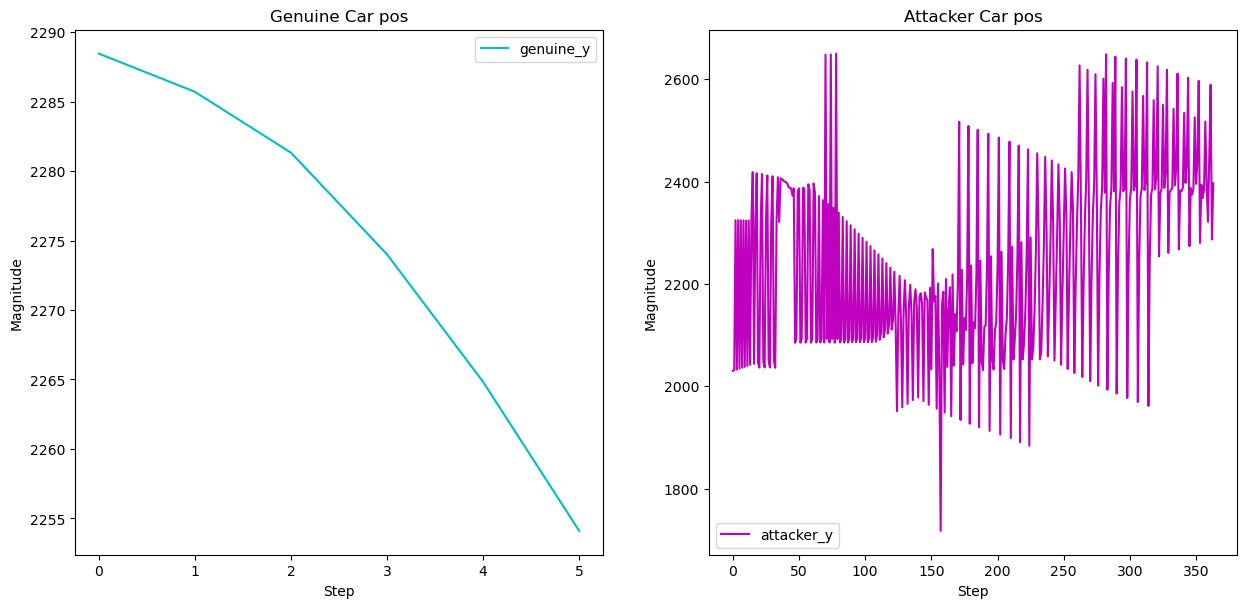

In [48]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'pos')


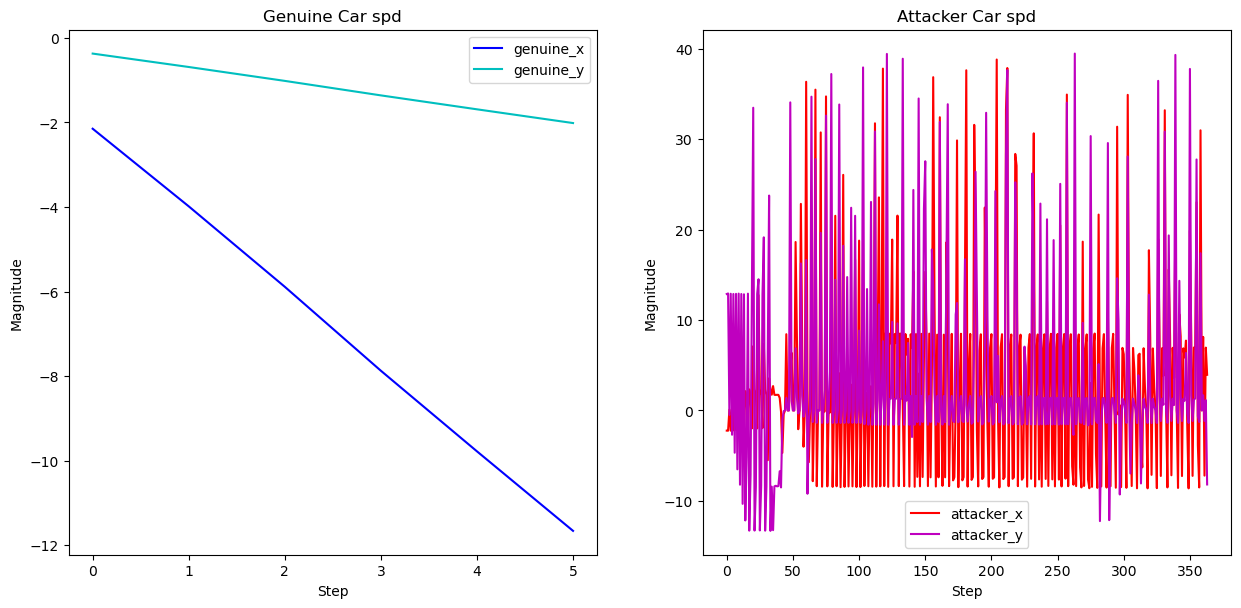

In [37]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'spd')


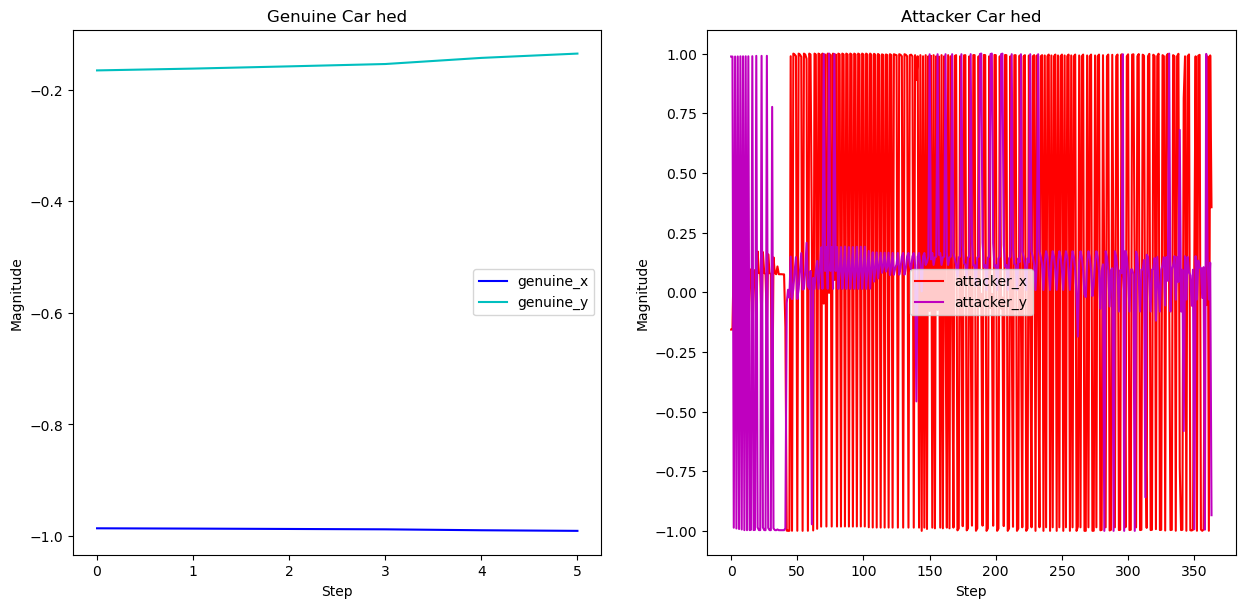

In [38]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'hed')


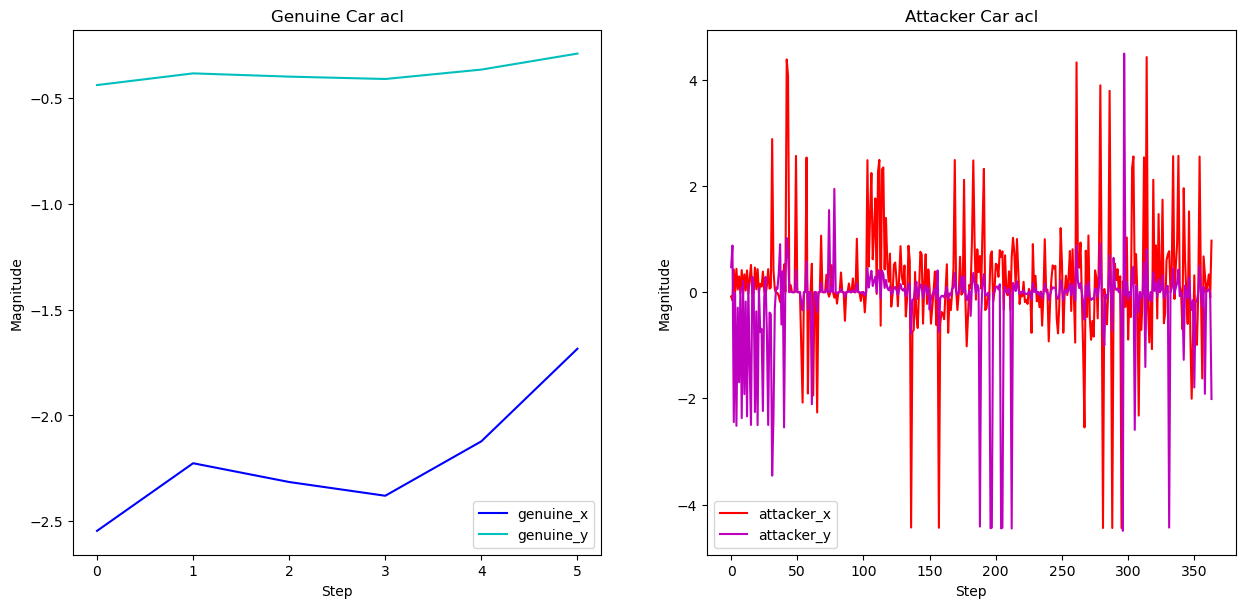

In [39]:
my_plot(part_6_data_genuine, part_6_data_attacker, 'acl')


# Part 7

In [41]:
part_8_data_genuine = read_data('part_8_data\\genuine.json')
part_8_data_genuine = part_8_data_genuine.loc[part_8_data_genuine['type'] == 3]
part_8_data_genuine = part_8_data_genuine.sort_values(by='rcvTime', ascending=True)
part_8_data_genuine.head()

,type,spd,acl,hed,pos,rcvTime
90,3,"(-2.147967240544927, -0.3709142752847634)","(-2.544428903817611, -0.4391486443483258)","(-0.9864858382692782, -0.16384654678741228)","(2263.135459757424, 338.3398825154282)",9.025704
101,3,"(-3.9840250341964882, -0.6880448534243747)","(-2.2246362129039596, -0.383471663840583)","(-0.9880443413225888, -0.15416996977495873)","(2259.474316063563, 337.8009121723481)",10.025706
112,3,"(-5.886142544232399, -1.015819577258487)","(-2.313492221091345, -0.39896561686899906)","(-0.9887585805094353, -0.14952079945267283)","(2255.1095060074194, 336.9407867871799)",11.025708
123,3,"(-7.872517117866957, -1.3596421047009661)","(-2.3782053710630056, -0.41001497451100416)","(-0.9903403559737882, -0.13865777774690635)","(2247.9307069898127, 335.7588549974764)",12.025711
134,3,"(-9.777494825986514, -1.687750686042842)","(-2.1209979072292198, -0.36537488782899336)","(-0.9914352619268295, -0.1305990865514726)","(2238.8280590684417, 334.1924605103363)",13.025713


In [42]:
part_8_data_attacker = read_data('part6_data\\traceJSON-33-31-A7-16.1-0.json')
part_8_data_attacker = part_8_data_attacker.loc[part_8_data_attacker['type'] == 3]
part_8_data_attacker = part_8_data_attacker.sort_values(by='rcvTime', ascending=True)
part_8_data_attacker.head()

,type,spd,acl,hed,pos,rcvTime
110,3,"(-2.233892932104349, 12.87651051089236)","(-0.08185103790486585, 0.4718918606326574)","(-0.15654829887320315, 0.9876703043626989)","(1955.0811094285618, 547.6094900844291)",51.025715
121,3,"(-2.244199223436734, 12.93596494276539)","(-0.15236498295900242, 0.8783258519011952)","(-0.15654829887324262, 0.9876703043626927)","(1952.526545601055, 560.5192271331989)",52.025704
125,3,"(0.08730675620745873, -0.49885547135380404)","(0.4283147122760306, -2.4472126581447)","(0.1621977472632163, -0.9867582737341186)","(2261.1961955045085, 538.4102493102407)",52.374684
133,3,"(-2.2386404538125424, 12.904425800209504)","(0.002264997212266013, -0.012967893393904317)","(-0.1565482988732514, 0.9876703043626912)","(1949.992683426265, 573.4390420604726)",53.025714
137,3,"(0.4706538436495997, -2.6891929506176844)","(0.4406305063324692, -2.517556408623525)","(0.14108540345448053, -0.98999742875024)","(2261.8082515355377, 536.6788300900148)",53.374685


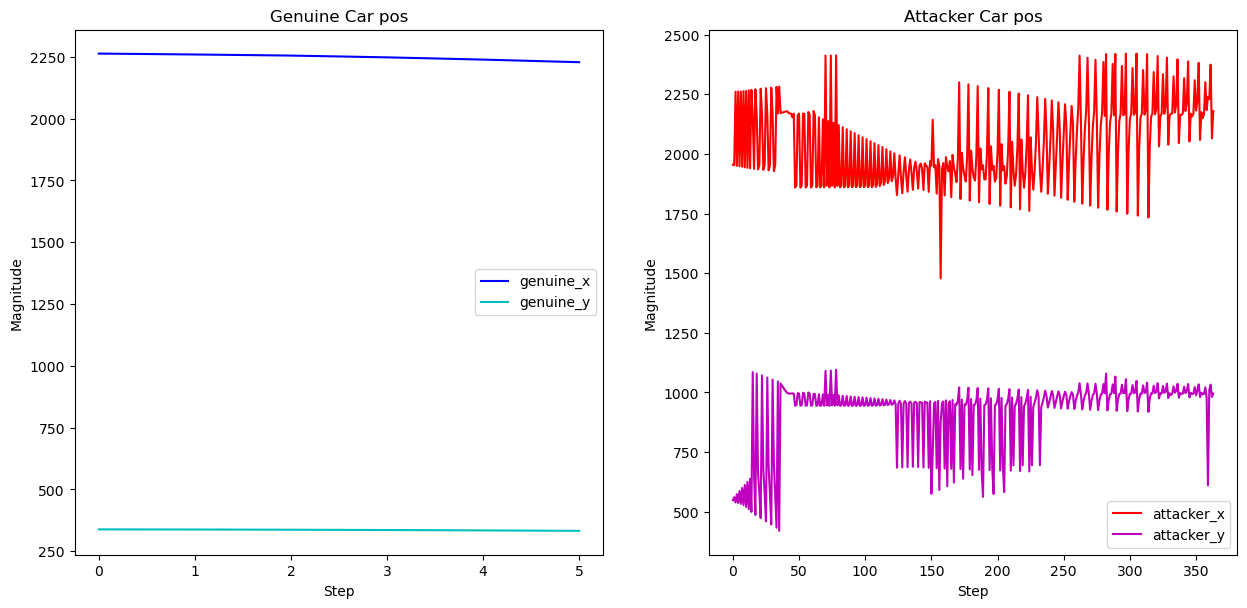

In [43]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'pos')

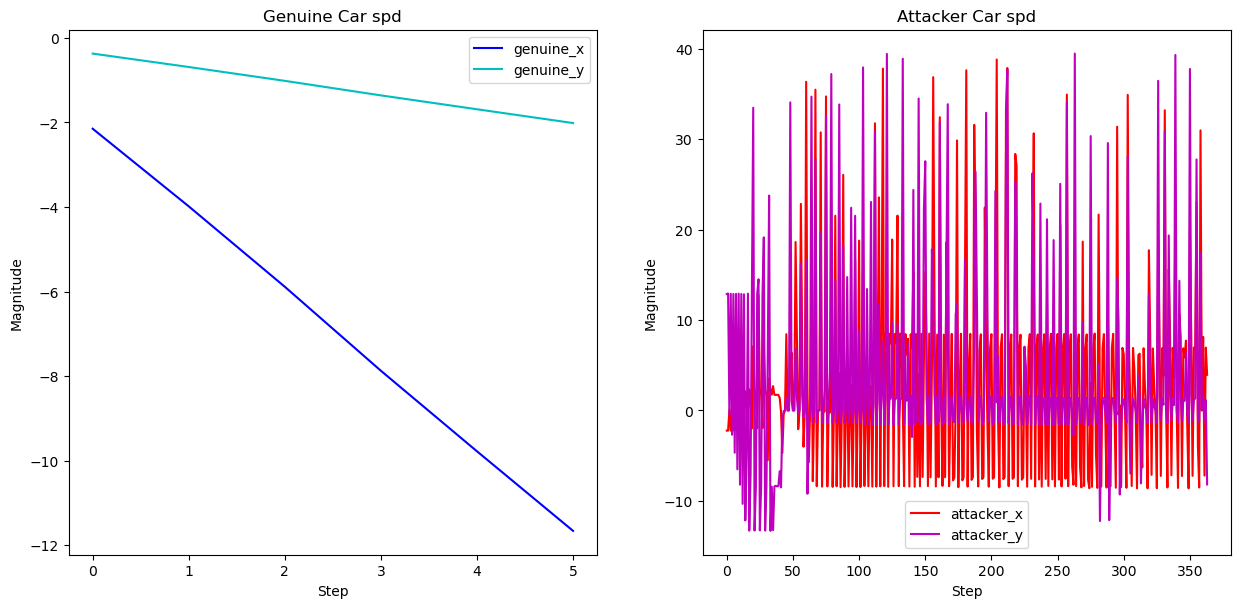

In [44]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'spd')



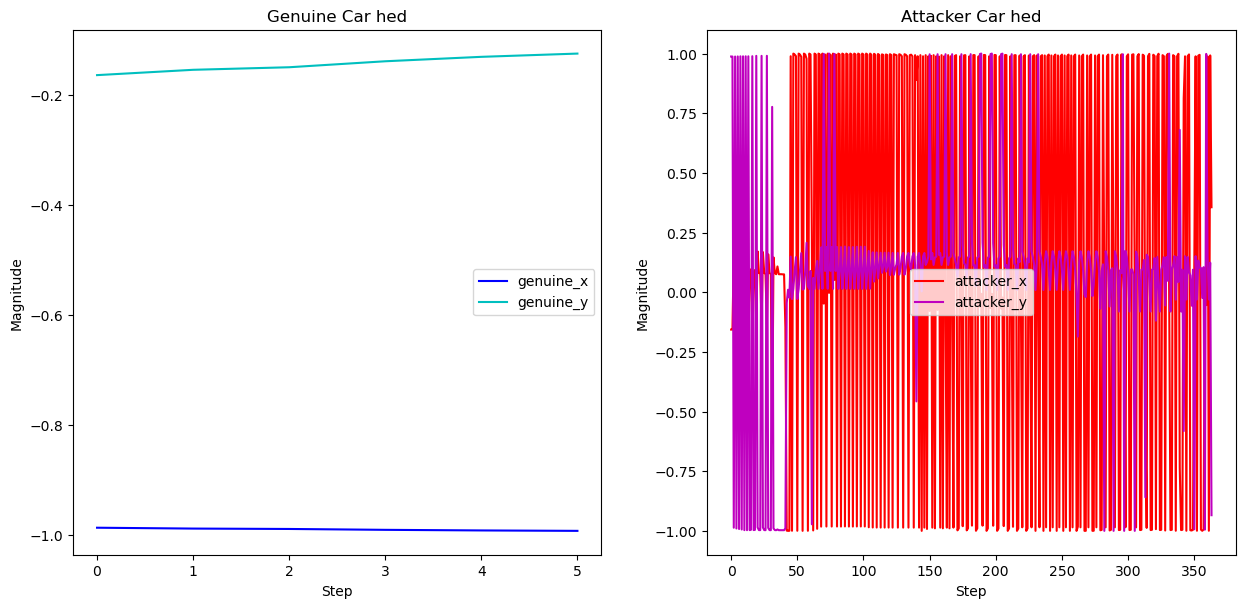

In [45]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'hed')


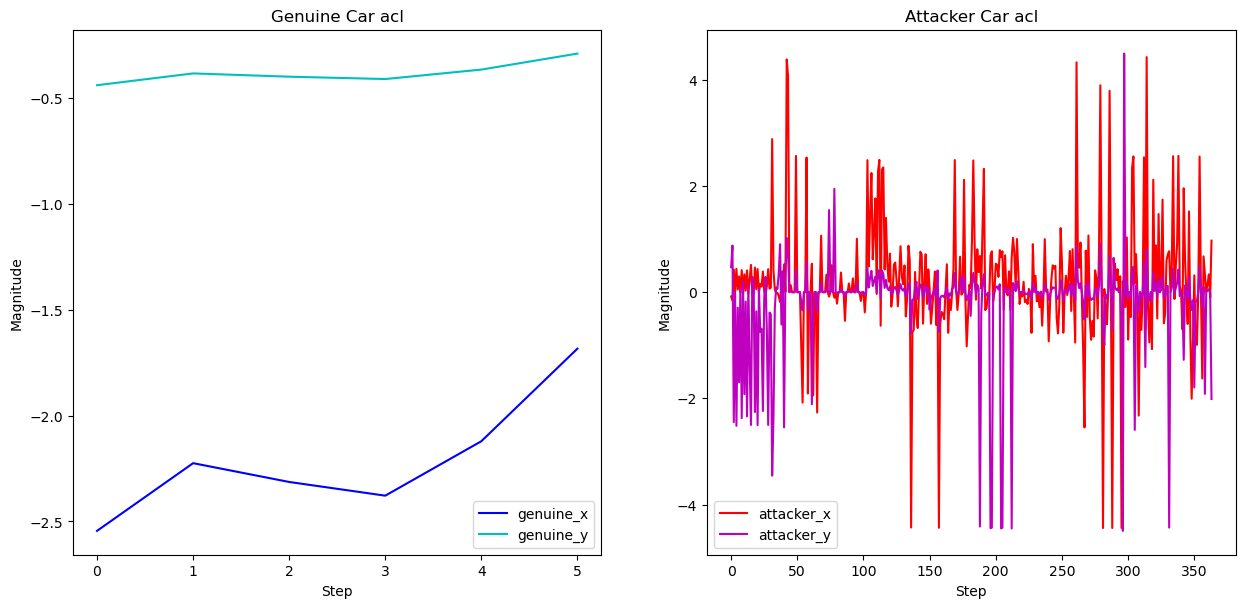

In [46]:
my_plot(part_8_data_genuine, part_8_data_attacker, 'acl')
